In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import *
from sklearn.model_selection import train_test_split

In [35]:
confirmed_cases = pd.read_csv("dataset/confirmed_cases.csv", index_col="Country/Region")

In [36]:
confirmed_cases = confirmed_cases.drop(["Province/State", "Lat", "Long"], axis=1)

In [4]:
confirmed_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Thailand,2,3,5,7,8,8,14,14,14,19,...,70,75,82,114,147,177,212,272,322,411
Japan,2,1,2,2,4,4,7,7,11,15,...,639,701,773,839,825,878,889,924,963,1007
Singapore,0,1,3,3,4,5,7,7,10,13,...,178,200,212,226,243,266,313,345,385,432
Nepal,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Malaysia,0,0,0,3,4,4,4,7,8,8,...,149,197,238,428,566,673,790,900,1030,1183
Canada,0,0,0,0,0,0,1,1,1,1,...,46,64,64,73,103,103,186,231,271,424
Australia,0,0,0,0,3,4,4,4,4,4,...,65,92,112,134,171,210,267,307,353,436
Australia,0,0,0,0,1,1,1,1,2,3,...,21,36,49,57,71,94,121,121,121,229
Australia,0,0,0,0,0,0,0,1,3,2,...,20,35,46,61,68,78,94,144,184,221


In [6]:
india_ts = confirmed_cases.loc["India"]

In [28]:
ind_model = auto_arima(india_ts, trace=True, error_action='ignore',m = 12,seasonal=True, stepwise=True, suppress_warnings=True)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 2, 2)x(1, 0, 1, 12) (constant=True); AIC=408.130, BIC=424.613, Time=0.444 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 12) (constant=True); AIC=408.620, BIC=412.741, Time=0.013 seconds
Fit ARIMA: (1, 2, 0)x(1, 0, 0, 12) (constant=True); AIC=409.665, BIC=417.907, Time=0.099 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 1, 12) (constant=True); AIC=410.125, BIC=418.367, Time=0.083 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 12) (constant=False); AIC=408.619, BIC=410.679, Time=0.014 seconds
Fit ARIMA: (2, 2, 2)x(0, 0, 1, 12) (constant=True); AIC=406.137, BIC=420.560, Time=0.241 seconds
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 12) (constant=True); AIC=405.253, BIC=417.616, Time=0.217 seconds
Fit ARIMA: (2, 2, 2)x(1, 0, 0, 12) (constant=True); AIC=406.172, BIC=420.595, Time=0.288 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 12) (constant=True); AIC=403.943, BIC=414.245, Time=0.076 seconds
Fit ARIMA: (1, 2, 2)x(1, 0, 0, 12) (constant=True); AIC=405.293, BIC=417.656, Time=

In [29]:
forecast = ind_model.predict()

In [30]:
forecast

array([ 420.82556809,  528.46884347,  638.64993367,  757.30194823,
        877.86375722, 1003.24783569, 1130.43108161, 1260.83419005,
       1393.06065472, 1527.79992893])

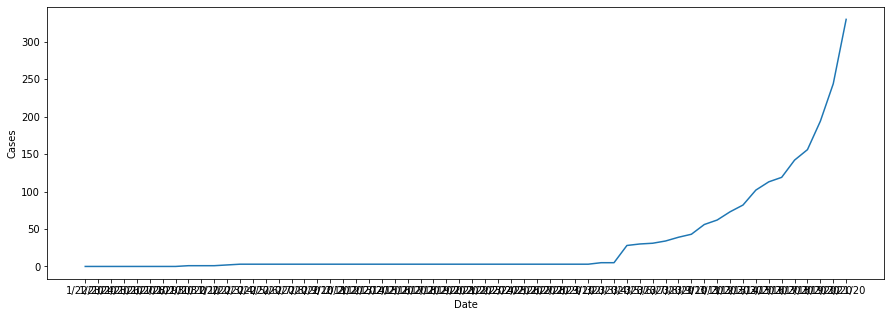

In [14]:
plt.figure(figsize=(15,5))
plt.plot(confirmed_cases.columns, confirmed_cases.loc['India'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

In [17]:
duplicated = confirmed_cases[confirmed_cases.duplicated(["Country/Region"])]

In [18]:
dup_country_list = []
dup_country_list = set(duplicated['Country/Region'])

In [22]:
for country in dup_country_list:
    print(country, len(confirmed_cases.loc[country]))

China 33
Canada 12
France 9
Netherlands 4
Australia 9
United Kingdom 7
US 247
Denmark 3


In [52]:
country_cases = {}
for country in dup_country_list:
    temp_matrix = np.matrix(confirmed_cases.loc[country])
    res_mat = np.zeros(temp_matrix[0].shape)
    for mats in temp_matrix:
        res_mat += mats
    country_cases[country] = res_mat[0]

In [68]:
confirmed_cases = confirmed_cases.drop(dup_country_list)

In [73]:
new_df = pd.DataFrame.from_dict(country_cases, orient="index")

In [92]:
new_df.columns = confirmed_cases.columns

In [100]:
confirmed_cases = confirmed_cases.append(new_df)

In [102]:
confirmed_cases.to_csv('dataset/final.csv')

In [112]:
final = pd.read_csv("dataset/final.csv", index_col="Unnamed: 0")

In [110]:
final

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
Thailand,2.0,3.0,5.0,7.0,8.0,8.0,14.0,14.0,14.0,19.0,...,70.0,75.0,82.0,114.0,147.0,177.0,212.0,272.0,322.0,411.0
Japan,2.0,1.0,2.0,2.0,4.0,4.0,7.0,7.0,11.0,15.0,...,639.0,701.0,773.0,839.0,825.0,878.0,889.0,924.0,963.0,1007.0
Singapore,0.0,1.0,3.0,3.0,4.0,5.0,7.0,7.0,10.0,13.0,...,178.0,200.0,212.0,226.0,243.0,266.0,313.0,345.0,385.0,432.0
Nepal,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Malaysia,0.0,0.0,0.0,3.0,4.0,4.0,4.0,7.0,8.0,8.0,...,149.0,197.0,238.0,428.0,566.0,673.0,790.0,900.0,1030.0,1183.0
Cambodia,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,3.0,5.0,7.0,7.0,7.0,33.0,35.0,37.0,51.0,53.0
Sri Lanka,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,2.0,6.0,10.0,18.0,28.0,44.0,51.0,60.0,73.0,77.0
Germany,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,5.0,...,2078.0,3675.0,4585.0,5795.0,7272.0,9257.0,12327.0,15320.0,19848.0,22213.0
Finland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,59.0,155.0,225.0,244.0,277.0,321.0,336.0,400.0,450.0,523.0
United Arab Emirates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,...,85.0,85.0,85.0,98.0,98.0,98.0,113.0,140.0,140.0,153.0
